In [1]:
from sklearn.preprocessing import PolynomialFeatures
# from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
# import smogn
from scipy.optimize import minimize
import csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn import svm
import numpy as np
import seaborn as sns
from scipy.stats import norm
import random
import math
import matplotlib.collections
from itertools import combinations
import networkx as nx

np.set_printoptions(threshold=np.inf)
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

np.set_printoptions(threshold=np.inf)


In [2]:

# # White Wines
# white_raw_data = pd.read_csv("clean_white.csv")
# white_raw_data.head()
#
# white_raw_data.isna().sum()
#
# X = white_raw_data.drop(["quality"], axis=1)
# Y = white_raw_data["quality"]
#
# Y.plot.hist()
# plt.show()
#
# # Resample the minority class. You can change the strategy to 'auto' if you are not sure.
# sm = SMOTE(sampling_strategy='auto', random_state=2, k_neighbors=2)
#
# # Fit the model to generate the data.
# oversampled_white_X, oversampled_white_Y = sm.fit_sample(X, Y)
# oversampled_white_data = pd.concat([pd.DataFrame(oversampled_white_X), pd.DataFrame(oversampled_white_Y)], axis=1)
#
# oversampled_white_data.to_csv('oversampled_clean_data_white.csv', index=False)
#
# oversampled_white_data['quality'].plot.hist()
# plt.show()
#
# mean = oversampled_white_X.mean()
# std = oversampled_white_X.std()
# normalized_white_X = (oversampled_white_X - mean) / std
# normalized_white_X.head()
#
# X_train, X_test, Y_train, Y_test = train_test_split(normalized_white_X, oversampled_white_Y, test_size=0.18,
#                                                     random_state=42)
#
# train_normalized_white_data = X_train.copy()
# train_normalized_white_data['quality'] = Y_train
#
# test_normalized_white_data = X_test.copy()
# test_normalized_white_data['quality'] = Y_test
# normalized_white_data = pd.concat([train_normalized_white_data, test_normalized_white_data])
# normalized_white_data.to_csv('normalized_clean_data_white.csv', index=False)
#
# sns.set(rc={'figure.figsize': (10, 8)})
# corr = oversampled_white_data.corr()
# sns.heatmap(corr,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values,
#             cmap="YlGnBu",
#             annot=True,
#             fmt=".2f")
# plt.show()
#
# # Red wines
#
# red_data = pd.read_csv("clean_red.csv")
# red_data.head()
#
# X = red_data.drop(["quality"], axis=1)
# Y = red_data["quality"]
#
# Y.plot.hist()
# plt.show()
#
# # Resample the minority class. You can change the strategy to 'auto' if you are not sure.
# sm = SMOTE(sampling_strategy='auto', random_state=2, k_neighbors=2)
#
# # Fit the model to generate the data.
# oversampled_red_X, oversampled_red_Y = sm.fit_sample(X, Y)
# oversampled_red_data = pd.concat([pd.DataFrame(oversampled_red_X), pd.DataFrame(oversampled_red_Y)], axis=1)
#
# oversampled_red_data.to_csv('oversampled_clean_data_red.csv', index=False)
#
# oversampled_red_data['quality'].plot.hist()
# plt.show()
#
# mean = oversampled_red_X.mean()
# std = oversampled_red_X.std()
# normalized_red_X = (oversampled_red_X - mean) / std
# normalized_red_X.head()
#
# X_train, X_test, Y_train, Y_test = train_test_split(normalized_red_X, oversampled_red_Y, test_size=0.18,
#                                                     random_state=42)
#
# train_normalized_red_data = X_train.copy()
# train_normalized_red_data['quality'] = Y_train
#
# test_normalized_red_data = X_test.copy()
# test_normalized_red_data['quality'] = Y_test
# normalized_red_data = pd.concat([train_normalized_red_data, test_normalized_red_data])
# normalized_red_data.to_csv('normalized_clean_data_red.csv', index=False)
#
# sns.set(rc={'figure.figsize': (10, 8)})
# corr = oversampled_red_data.corr()
# sns.heatmap(corr,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values,
#             cmap="YlGnBu",
#             annot=True,
#             fmt=".2f")
# plt.show()


r2 score =  0.7529734249540303
train_rmse = 0.8742039787661448
test_rmse = 0.8272907977158209
r2 score =  0.8307322645137725
train_rmse = 0.6769437450536299
test_rmse = 0.684815287968331


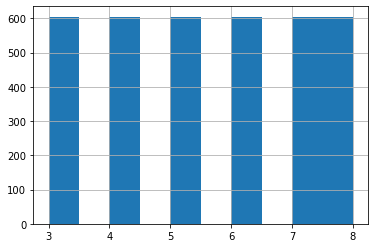

In [3]:

File_name = 'normalized_clean_data_red.csv'
# File_name = 'normalized_clean_data_white.csv'

data = pd.read_csv(File_name)
X = data.drop(['quality'], axis=1)
Y = data['quality']
data.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Y.hist()
# Question 1.a - Regrestion
# we'll try out three regresion models and compair them.
# 1. linear and polynomial regrestion
# 2. SVM Regresor
# 3. neural network regresor


# Linear Regrestion

reg = LinearRegression().fit(X_train, Y_train)
print('r2 score = ', reg.score(X_test, Y_test))

a = reg.predict(X_train)
train_rmse = (mean_squared_error(a, Y_train)) ** 0.5
print('train_rmse =', train_rmse)
b = reg.predict(X_test)
test_rmse = (mean_squared_error(b, Y_test)) ** 0.5
print('test_rmse =', test_rmse)

# Polynomial Regression


p_reg = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

p_reg = p_reg.fit(X_train, Y_train)
p_reg.named_steps['linear'].coef_

from sklearn.metrics import mean_squared_error

print('r2 score = ', p_reg.score(X_test, Y_test))
a = p_reg.predict(X_train)
train_rmse = (mean_squared_error(a, Y_train)) ** 0.5
print('train_rmse =', train_rmse)
b = p_reg.predict(X_test)
test_rmse = (mean_squared_error(b, Y_test)) ** 0.5
print('test_rmse =', test_rmse)


In [4]:

# SVM Regresor


SVR_rbf = svm.SVR(kernel='rbf')
SVR_lin = svm.SVR(kernel='linear')
SVR_poly = svm.SVR(kernel='poly', degree=2)
SVR_rbf.fit(X_train, Y_train)
SVR_lin.fit(X_train, Y_train)
SVR_poly.fit(X_train, Y_train)

print('SVR_rbf score = ', SVR_rbf.score(X_train, Y_train))
a = SVR_rbf.predict(X_train)
train_rmse = (mean_squared_error(a, Y_train)) ** 0.5
print('SVR_rbf train_rmse = ', train_rmse)
b = SVR_rbf.predict(X_test)
test_rmse = (mean_squared_error(b, Y_test)) ** 0.5
print('SVR_rbf test_rmse = ', test_rmse, '\n')

print('SVR_lin score = ', SVR_lin.score(X_train, Y_train))
a = SVR_lin.predict(X_train)
train_rmse = (mean_squared_error(a, Y_train)) ** 0.5
print('SVR_lin train_rmse = ', train_rmse)
b = SVR_lin.predict(X_test)
test_rmse = (mean_squared_error(b, Y_test)) ** 0.5
print('SVR_lin test_rmse = ', test_rmse, '\n')

print('SVR_poly score = ', SVR_poly.score(X_train, Y_train))
a = SVR_poly.predict(X_train)
train_rmse = (mean_squared_error(a, Y_train)) ** 0.5
print('SVR_poly train_rmse = ', train_rmse)
b = SVR_poly.predict(X_test)
test_rmse = (mean_squared_error(b, Y_test)) ** 0.5
print('SVR_poly test_rmse = ', test_rmse)


SVR_rbf score =  0.9238978851028715
SVR_rbf train_rmse =  0.47406962456329504
SVR_rbf test_rmse =  0.4846703524254302 

SVR_lin score =  0.732014569657285
SVR_lin train_rmse =  0.8896093891034553
SVR_lin test_rmse =  0.8315069480452789 

SVR_poly score =  0.4970064682561395
SVR_poly train_rmse =  1.2187790107839602
SVR_poly test_rmse =  1.275560777196859


Epoch 1/100
64/64 [==============================] - 1s 10ms/step - loss: 14.6277 - mean_squared_error: 14.6277 - val_loss: 0.7683 - val_mean_squared_error: 0.7683
Epoch 2/100
64/64 [==============================] - 0s 5ms/step - loss: 1.6750 - mean_squared_error: 1.6750 - val_loss: 0.6922 - val_mean_squared_error: 0.6922
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 1.3999 - mean_squared_error: 1.3999 - val_loss: 0.5945 - val_mean_squared_error: 0.5945
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 1.0836 - mean_squared_error: 1.0836 - val_loss: 0.7005 - val_mean_squared_error: 0.7005
Epoch 5/100
64/64 [==============================] - 0s 4ms/step - loss: 0.9996 - mean_squared_error: 0.9996 - val_loss: 0.5487 - val_mean_squared_error: 0.5487
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 0.9839 - mean_squared_error: 0.9839 - val_loss: 0.5170 - val_mean_squared_error: 0.5170
Epoch 7/100
64/64 [============

64/64 [==============================] - 0s 3ms/step - loss: 0.3911 - mean_squared_error: 0.3911 - val_loss: 0.3194 - val_mean_squared_error: 0.3194
Epoch 52/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4468 - mean_squared_error: 0.4468 - val_loss: 0.3058 - val_mean_squared_error: 0.3058
Epoch 53/100
64/64 [==============================] - 0s 3ms/step - loss: 0.3833 - mean_squared_error: 0.3833 - val_loss: 0.3054 - val_mean_squared_error: 0.3054
Epoch 54/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4165 - mean_squared_error: 0.4165 - val_loss: 0.3134 - val_mean_squared_error: 0.3134
Epoch 55/100
64/64 [==============================] - 0s 3ms/step - loss: 0.3933 - mean_squared_error: 0.3933 - val_loss: 0.3561 - val_mean_squared_error: 0.3561
Epoch 56/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4277 - mean_squared_error: 0.4277 - val_loss: 0.3131 - val_mean_squared_error: 0.3131
Epoch 57/100
64/64 [=====================

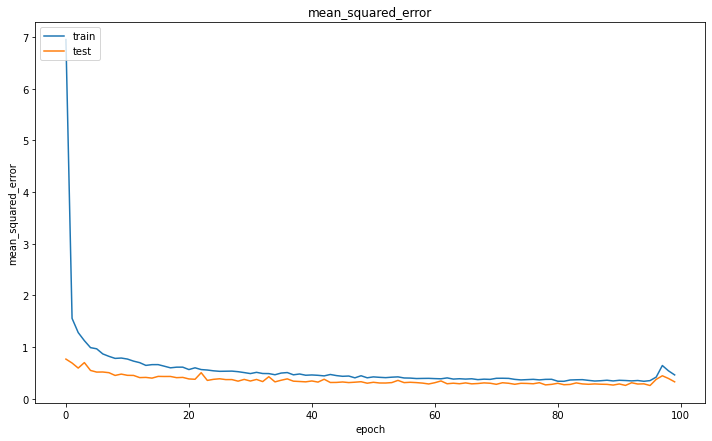

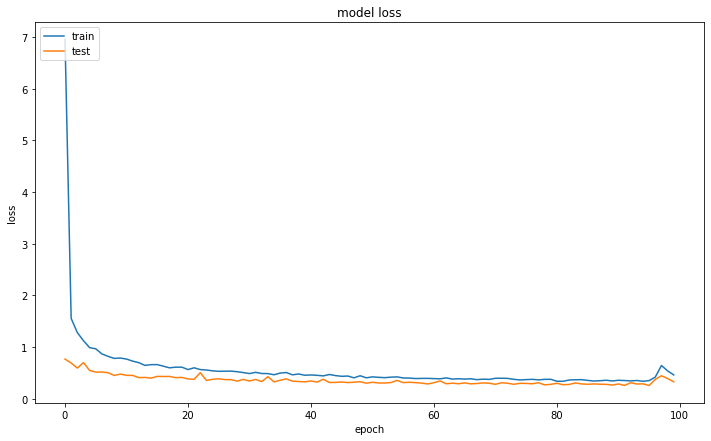

NN train_rmse =  0.5747070434176783
NN test_rmse =  0.5817023470481155


In [5]:

# Deep Neural Network Regresor

import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Dropout
from keras.models import Model
import tensorflow as tf

DNN_model = Sequential()
DNN_model.add(Dense(100, input_dim=11, activation='selu'))
DNN_model.add(Dropout(0.1))
DNN_model.add(Dense(128, activation='selu'))
DNN_model.add(Dropout(0.1))
DNN_model.add(Dense(128, activation='selu'))
DNN_model.add(Dropout(0.1))
DNN_model.add(Dense(2, activation='selu'))
DNN_model.add(Dense(1))

DNN_model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
history = DNN_model.fit(X_train, Y_train, epochs=100, validation_split=0.3)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(12, 7))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

a = DNN_model.predict(X_train)
train_rmse = (mean_squared_error(a, Y_train)) ** 0.5
print('NN train_rmse = ', train_rmse)
b = DNN_model.predict(X_test)
test_rmse = (mean_squared_error(b, Y_test)) ** 0.5
print('NN test_rmse = ', test_rmse)



In [6]:

# # # # # # # # # # # # # # # # # # # # # # # Clustering:
def points_for_cluster_df(clustering_labels):
    hist_dictionary = {}
    for i in clustering_labels:
        if str(i) in hist_dictionary:
            hist_dictionary[str(i)] = hist_dictionary[str(i)] + 1
        else:
            hist_dictionary[str(i)] = 1
    clusters_names_numeric = [int(x) for x in hist_dictionary.keys()]
    clusters_names_numeric.sort()
    clusters_names = [str(name) for name in clusters_names_numeric]
    points_amount_for_cluster = [hist_dictionary[x] for x in clusters_names]
    clustering_hist_df = pd.DataFrame([points_amount_for_cluster])
    clustering_hist_df.columns = clusters_names
    return clustering_hist_df


def plot_silhouette_score(clustering_method, clusters, s_scores):
    plt.plot(clusters, s_scores, color='blue', label='Silhouette score')
    plt.title(clustering_method + ' clustering Silhouette score depending on clusters number')
    plt.ylabel('Silhouette score')
    plt.xlabel('clusters')
    # plt.axhline(0, lw=0.5, color='black')
    # plt.axvline(0, lw=0.5, color='black')
    plt.legend()
    plt.show()



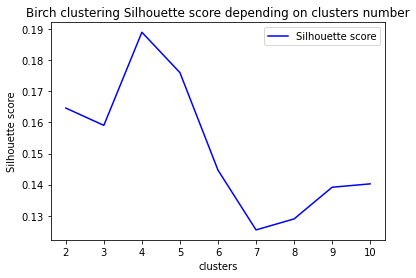

,0,1,2,3
0,878,627,400,999


In [7]:

# # # # # BIRCH
s_scores = []
clusters = range(2, 11)
for i in clusters:
    br = Birch(n_clusters=i).fit(X_train)
    s_scores.append(silhouette_score(X_train, br.labels_))

plot_silhouette_score('Birch', clusters, s_scores)

# Optimize Birch clustering with 4 clusters:
optimize_br = Birch(n_clusters=4).fit(X_train)
points_for_cluster_df(optimize_br.labels_)


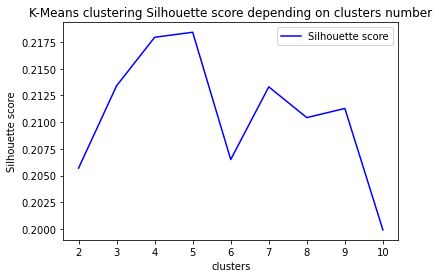

,0,1,2,3,4
0,936,502,587,253,626


In [8]:

# # # # # K-Means:
s_scores = []
clusters = range(2, 11)
for i in clusters:
    k_means = KMeans(n_clusters=i, random_state=0).fit(X_train)
    s_scores.append(silhouette_score(X_train, k_means.labels_))

plot_silhouette_score('K-Means', clusters, s_scores)

# Optimize K-Means clustering 5 clusters:

optimize_km = KMeans(n_clusters=5, random_state=0).fit(X_train)
points_for_cluster_df(optimize_km.labels_)


In [9]:

# # # # # MeanShift:

# Optimize MeanShift clustering using estimate_bandwidth:

optimize_bandwidth = estimate_bandwidth(X_train)
optimize_ms = MeanShift(bandwidth=optimize_bandwidth).fit(X_train)
points_for_cluster_df(optimize_ms.labels_)

print(optimize_bandwidth)
print()


3.8471424931888505



In [10]:


# # # # # Predict qualities with the clusters mean quality:

def mean_quality_for_cluster_dictionary(df, clustering):
    mean_qualities = {}
    for i in df[clustering].unique():
        mean_qualities[i] = df[df[clustering] == i]['quality'].mean()
    return mean_qualities


def cluster_score(cluster_quality_dict: dict, test_cluster_lables: pd.Series, real_test_values: pd.Series):
    predicted_qualities = []
    for i in test_cluster_lables:
        predicted_qualities.append(cluster_quality_dict[i])
    predicted_qualities = pd.Series(predicted_qualities)
    return mean_squared_error(predicted_qualities, real_test_values) ** 0.5


train_with_clusters = X_train.copy()
train_with_clusters['quality'] = Y_train
# MeanShift:
train_with_clusters['ms_cluster'] = optimize_ms.labels_
ms_qualities_dict = mean_quality_for_cluster_dictionary(train_with_clusters, 'ms_cluster')
# Birch:
train_with_clusters['br_cluster'] = optimize_br.labels_
br_qualities_dict = mean_quality_for_cluster_dictionary(train_with_clusters, 'br_cluster')
# Kmeans
train_with_clusters['km_cluster'] = optimize_km.labels_
km_qualities_dict = mean_quality_for_cluster_dictionary(train_with_clusters, 'km_cluster')

print('ms_qualities_dict: ', ms_qualities_dict)
print()
print('br_qualities_dict: ', br_qualities_dict)
print()
print('km_qualities_dict: ', km_qualities_dict)
print()

test = X_test.copy()
test['quality'] = Y_test

# Birch:
br_test_labels = optimize_br.predict(X_test)
print('Birch score: ', cluster_score(br_qualities_dict, br_test_labels, test['quality']))

# K-Means
km_test_labels = optimize_km.predict(X_test)
print('K-Means score: ', cluster_score(km_qualities_dict, km_test_labels, test['quality']))

# MeanShift:
ms_test_labels = optimize_ms.predict(X_test)
print('Mean Shift score: ', cluster_score(ms_qualities_dict, ms_test_labels, test['quality']))



ms_qualities_dict:  {0: 5.49793388429752}

br_qualities_dict:  {2: 4.8925, 3: 4.25025025025025, 0: 6.255125284738041, 1: 6.811802232854864}

km_qualities_dict:  {2: 4.7580919931856895, 0: 4.223290598290598, 4: 7.167731629392971, 1: 6.03784860557769, 3: 6.7272727272727275}

Birch score:  1.3139478918719818
K-Means score:  1.2237138149892357
Mean Shift score:  1.6645418518414183


In [11]:
# # # # # # # # Dimension Reduction
def printPrejections(reducted_df: pd.DataFrame, model_name: str):
    for i in range(0, 2):
        for j in range(i + 1, 3):
            plotName = model_name + ' (dim ' + str(i) + '),(dim ' + str(j) + ')'
            dim1 = '(dim ' + str(i) + ')'
            dim2 = '(dim ' + str(j) + ')'
            vis = pd.DataFrame()
            vis[dim1] = reducted_df[i]
            vis[dim2] = reducted_df[j]
            vis['Y'] = reducted_df['quality']
            plt.figure(figsize=(16, 10))
            sns.scatterplot(
                x=dim1, y=dim2,
                hue="Y",
                palette=sns.color_palette("hls", len(set(list(reducted_df['quality'])))),
                data=vis,
                legend="full",
                alpha=0.8
            ).set_title(plotName)
            plt.show()



In [12]:

## pca
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

pca_df = pd.DataFrame(pca.transform(X))
pca_df['quality'] = Y

import seaborn as sns

sns.set(rc={'figure.figsize': (10, 8)})
corr = pca_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.show()

printPrejections(pca_df, 'PCA')


ValueError: array must not contain infs or NaNs

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 0.5993 - val_loss: 0.5973
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6041 - val_loss: 0.5971
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6024 - val_loss: 0.5969
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5992 - val_loss: 0.5967
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6051 - val_loss: 0.5966
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5998 - val_loss: 0.5964
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6078 - val_loss: 0.5962
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6042 - val_loss: 0.5960
Epoch 9/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5997 - val_loss: 0.5958
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6051 - val_loss: 0.5956
Epoch 11

15/15 [==============================] - 0s 5ms/step - loss: 0.5848 - val_loss: 0.5778
Epoch 84/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5827 - val_loss: 0.5775
Epoch 85/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5855 - val_loss: 0.5772
Epoch 86/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5851 - val_loss: 0.5769
Epoch 87/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5878 - val_loss: 0.5767
Epoch 88/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5833 - val_loss: 0.5764
Epoch 89/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5836 - val_loss: 0.5761
Epoch 90/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5861 - val_loss: 0.5758
Epoch 91/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5820 - val_loss: 0.5755
Epoch 92/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5803 - val_loss: 0.5752
Epoch 93/100


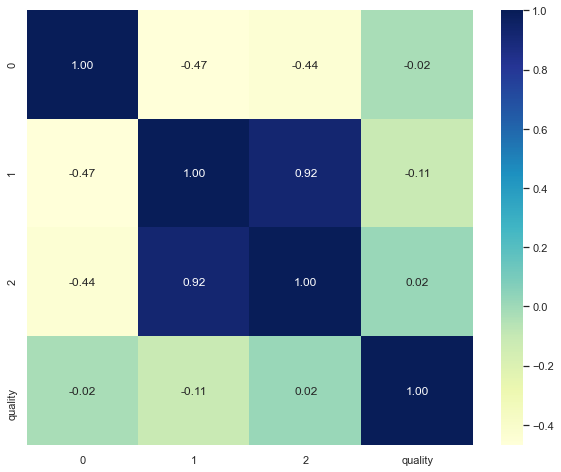

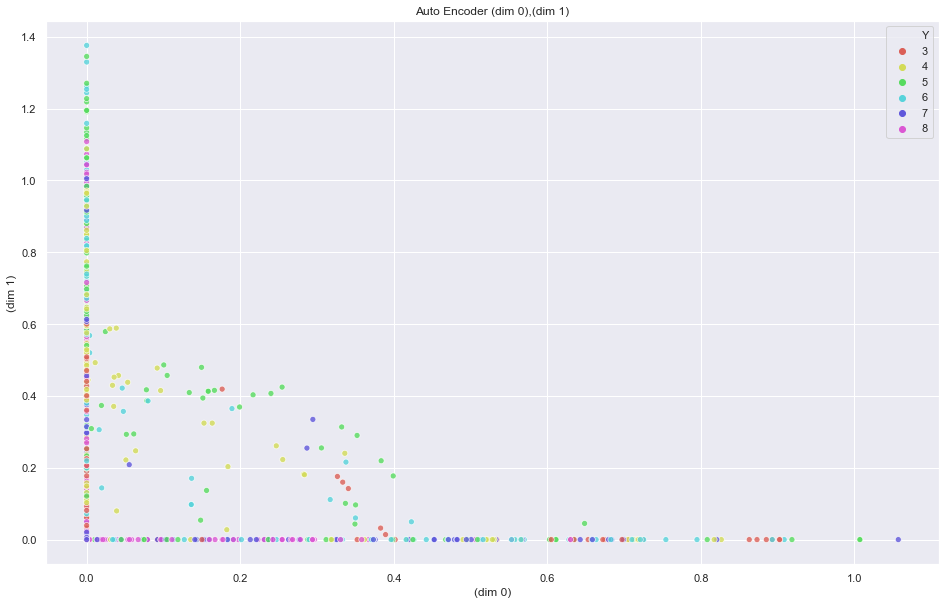

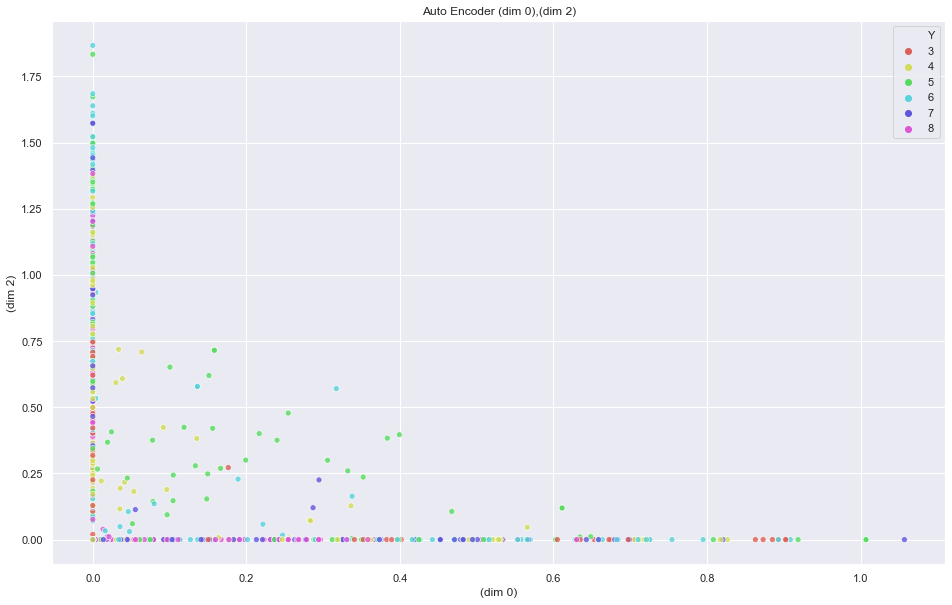

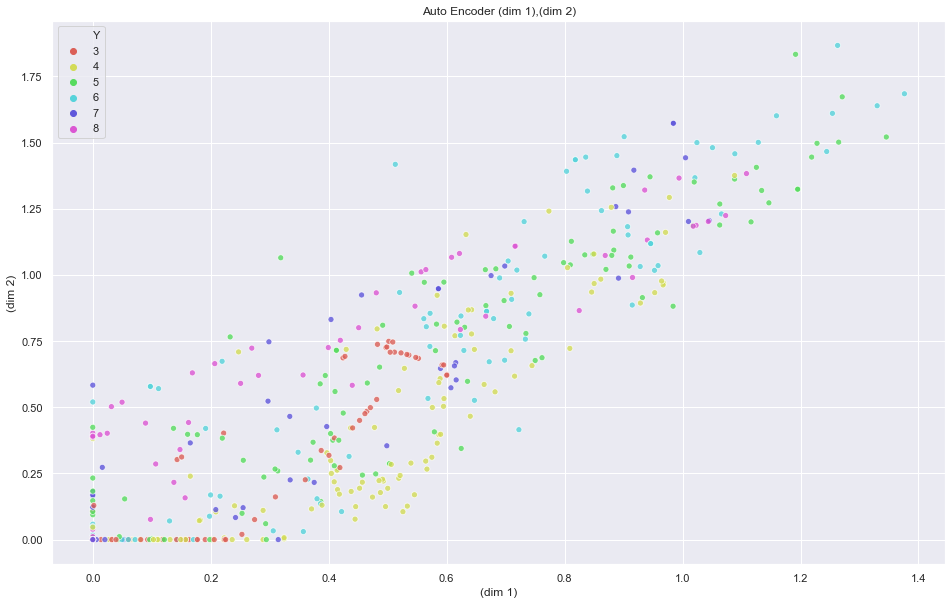

In [13]:

## Auto Encoder

input_dim = Input(shape=(11,))
# DEFINE THE DIMENSION OF ENCODER ASSUMED 3
encoding_dim = 3
# DEFINE THE ENCODER LAYERS
encoded1 = Dense(9, activation='selu')(input_dim)
encoded2 = Dense(6, activation='selu')(encoded1)
encoded3 = Dense(4, activation='selu')(encoded2)
encoded4 = Dense(encoding_dim, activation='relu')(encoded3)
# DEFINE THE DECODER LAYERS
decoded1 = Dense(4, activation='selu')(encoded4)
decoded2 = Dense(6, activation='selu')(decoded1)
decoded3 = Dense(9, activation='selu')(decoded2)
decoded4 = Dense(11, activation='sigmoid')(decoded3)
# COMBINE ENCODER AND DECODER INTO AN AUTOENCODER MODEL
autoencoder = Model(input_dim, decoded4)
# CONFIGURE AND TRAIN THE AUTOENCODER
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=200, shuffle=True, validation_data=(X_test, X_test))
# THE ENCODER TO EXTRACT THE REDUCED DIMENSION FROM THE ABOVE AUTOENCODER
encoder = Model(input_dim, encoded4)
encoded_input = Input(shape=(encoding_dim,))
encoded_out = encoder.predict(X_test)

AE_data = pd.DataFrame(encoded_out)
AE_data['quality'] = Y_test.values

sns.set(rc={'figure.figsize': (10, 8)})
corr = AE_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.show()

printPrejections(AE_data, 'Auto Encoder')


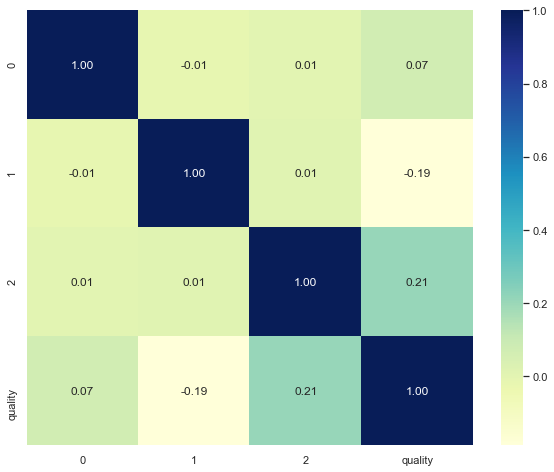

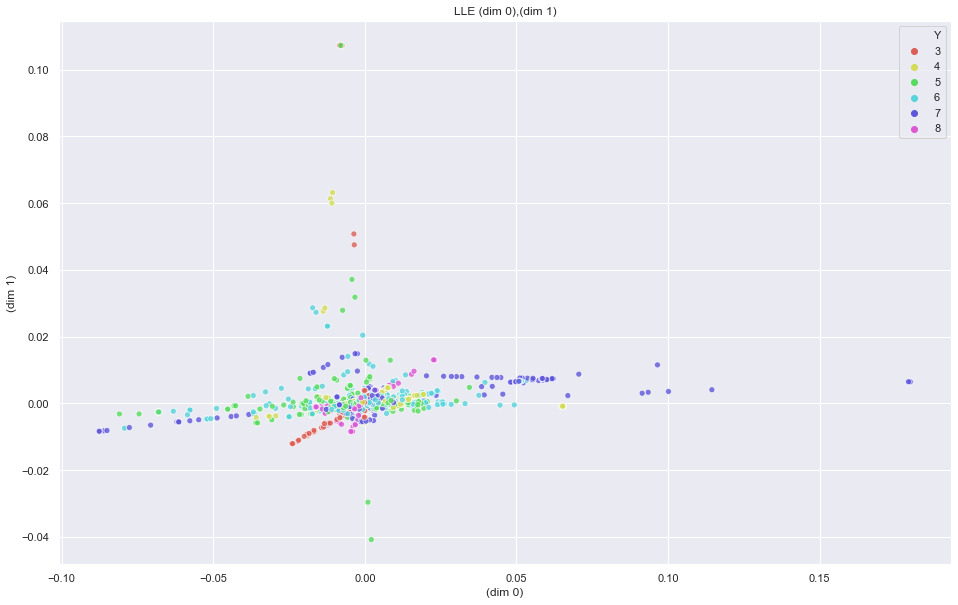

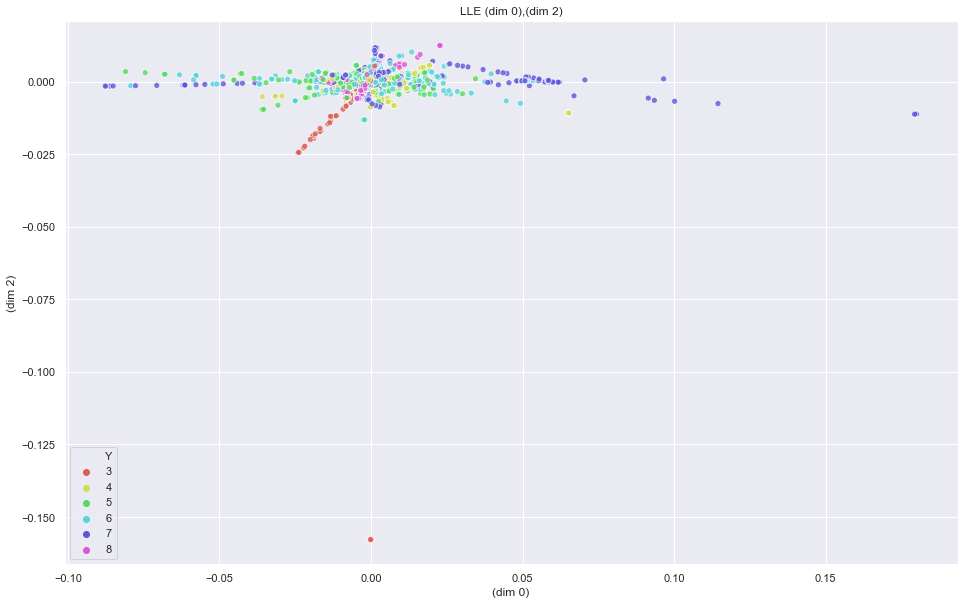

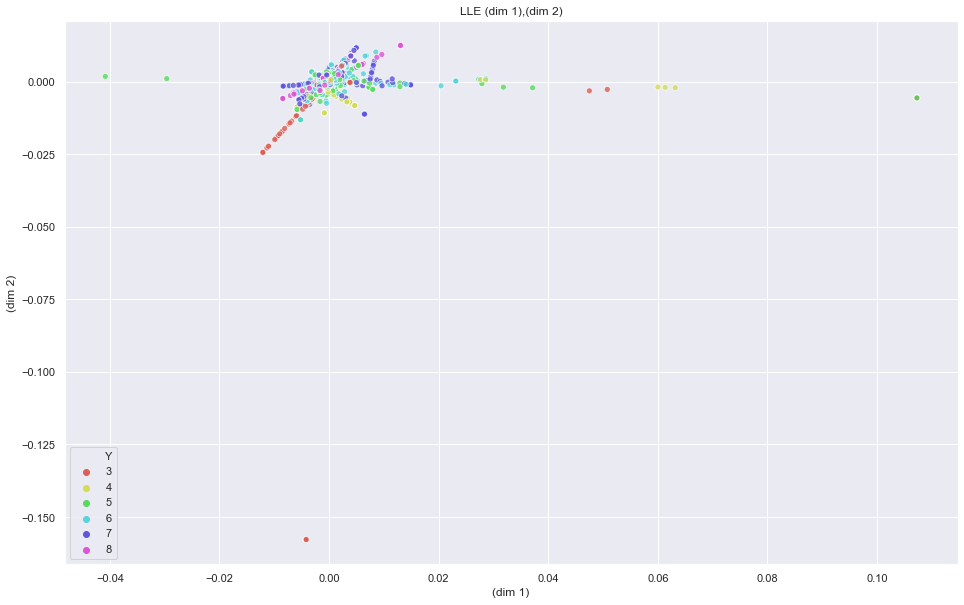

In [14]:

## LLE

from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=3)
X_transformed = embedding.fit_transform((X - X.mean()) / X.std())
X_transformed.shape

LLE_data = pd.DataFrame(X_transformed)
LLE_data['quality'] = Y.values
import seaborn as sns

sns.set(rc={'figure.figsize': (10, 8)})
corr = LLE_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.show()

printPrejections(LLE_data, 'LLE')


In [15]:
## Linear Models Compereson

import math

def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
  return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))


def continues_jacard(vec1: np.ndarray, vec2: np.ndarray):
    numerator = 0
    denominator = 0
    if len(vec1) == len(vec2):
        for i in range(0, len(vec1)):
            numerator += min(vec1[i], vec2[i])
            denominator += max(vec1[i], vec2[i])
        return numerator / denominator
    return -1


def vectorComperesion(vec1, vec1_name: str, vec2, vec2_name: str):
    print(f'radial angle between {vec1_name} and {vec2_name} = {angle(vec1, vec2)}')
    print(f'cosine test between {vec1_name} and {vec2_name} = {math.cos(angle(vec1, vec2))}')
    print(f'euclidean distance between {vec1_name} and {vec2_name} = {np.linalg.norm(vec1-vec2)}')
    jac = continues_jacard(vec1, vec2)
    if jac != -1:
        print(f'jaccard score between {vec1_name} and {vec2_name} = {jac}')
    else:
        print(f'jaccard Error for {vec1_name} and {vec2_name}')


def threeVectorComperesion(vec1, vec1_name: str, vec2, vec2_name: str, vec3, vec3_name: str):
    print(f'{vec1_name} is {vec1}')
    print(f'{vec2_name} is {vec2}')
    print(f'{vec3_name} is {vec3}\n\n')

    print(f'magnitude of {vec1_name} is {np.linalg.norm(vec1)}')
    print(f'magnitude of {vec2_name} is {np.linalg.norm(vec2)}')
    print(f'magnitude of {vec3_name} is {np.linalg.norm(vec3)}\n\n')
    vec_list = [(vec1, vec1_name), (vec2, vec2_name), (vec3, vec3_name)]
    for i in range(0, 2):
        for j in range(i+1, 3):
            vectorComperesion(vec_list[i][0], vec_list[i][1], vec_list[j][0], vec_list[j][1])



In [21]:
red_file = 'clean_red.csv'
white_file = 'clean_white.csv'
red_data = pd.read_csv(red_file)
white_data = pd.read_csv(white_file)
all_data = pd.concat([red_data, white_data])

all_mean = all_data.drop(['quality'], axis=1).mean()
all_std = all_data.drop(['quality'], axis=1).std()
normalized_all_X = (all_data.drop(['quality'], axis=1) - all_mean) / all_std


normalized_red_X = (red_data.drop(['quality'], axis=1) - all_mean) / all_std
normalized_white_X = (white_data.drop(['quality'], axis=1) - all_mean) / all_std




red_X_train, red_X_test, red_y_train, red_y_test = \
    train_test_split(normalized_red_X, red_data['quality'], test_size=0.20, random_state=42)
white_X_train, white_X_test, white_y_train, white_y_test = \
    train_test_split(normalized_white_X, white_data['quality'], test_size=0.20, random_state=42)
all_X_train, all_X_test, all_y_train, all_y_test = \
    train_test_split(normalized_all_X, all_data['quality'], test_size=0.20, random_state=42)

In [22]:
red_X_train


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1127,0.804415,2.833074,-2.298561,-0.685594,1.896858,-1.029522,-1.618234,1.094885,0.933778,-0.483022,-0.767765
898,1.361067,0.113551,0.626090,-0.388527,2.956480,-1.088214,-1.654165,0.303484,0.057243,1.308522,1.247505
1187,-0.547453,1.188711,-1.494282,-0.770471,1.089527,-1.029522,-1.402652,0.306910,0.745949,-0.035136,-1.019674
310,3.746717,0.619509,2.527114,-0.494622,2.906022,-1.205599,-1.672130,1.848601,-0.443634,2.428238,-0.096008
1144,-0.070323,0.809243,-0.836236,-0.749252,1.291359,-0.149136,-1.115209,0.341170,0.933778,0.860636,-0.096008
...,...,...,...,...,...,...,...,...,...,...,...
1095,1.440589,1.568180,-0.470654,-0.728033,2.653731,-1.322984,-1.708060,1.057199,0.307682,1.457818,-0.767765
1130,0.009199,1.504935,-1.932980,-0.664375,1.493192,-0.853445,-1.438582,0.354874,0.996388,0.562045,-0.179978
1294,0.009199,0.240041,0.041160,-0.728033,0.534486,-0.912137,-1.582304,0.032832,0.057243,1.532465,0.659718
860,-0.388410,1.441690,-1.640515,-0.537060,1.392276,-1.381676,-1.690095,0.714602,1.497265,0.636693,-0.263947


In [23]:
# Linear Regrestion

red_lin_reg = LinearRegression().fit(red_X_train, red_y_train)
white_lin_reg = LinearRegression().fit(white_X_train, white_y_train)
all_lin_reg = LinearRegression().fit(all_X_train, all_y_train)

red_lin_reg_vec = np.array(red_lin_reg.coef_)
white_lin_reg_vec = np.array(white_lin_reg.coef_)
all_lin_reg_vec = np.array(all_lin_reg.coef_)

threeVectorComperesion(red_lin_reg_vec, 'red_lin_reg_vec', white_lin_reg_vec, 'white_lin_reg_vec',
                       all_lin_reg_vec, 'all_lin_reg_vec')


red_lin_reg_vec is [ 0.0347275  -0.15950826 -0.03279129 -0.06876337 -0.08394959  0.05825289
 -0.15279158 -0.09279339 -0.09874426  0.17957529  0.30861513]
white_lin_reg_vec is [ 0.17581354 -0.29497157 -0.0199349   0.46693191 -0.04500097  0.0990205
 -0.00817295 -0.6191895   0.14616413  0.10650135  0.12408832]
all_lin_reg_vec is [ 0.12062183 -0.19252791 -0.01279648  0.24175112 -0.00408151  0.13918144
 -0.14778723 -0.22739027  0.08238701  0.12822288  0.30301622]


magnitude of red_lin_reg_vec is 0.4605327105517885
magnitude of white_lin_reg_vec is 0.8830279859410304
magnitude of all_lin_reg_vec is 0.5640984538560425


radial angle between red_lin_reg_vec and white_lin_reg_vec = 1.2377675699438586
cosine test between red_lin_reg_vec and white_lin_reg_vec = 0.3269068699615652
euclidean distance between red_lin_reg_vec and white_lin_reg_vec = 0.8520250975059721
jaccard score between red_lin_reg_vec and white_lin_reg_vec = -0.9780349190885076
radial angle between red_lin_reg_vec and all_lin_re

In [24]:
#linear SVM


red_lin_SVM = svm.SVR(kernel='linear').fit(red_X_train, red_y_train)
white_lin_SVM = svm.SVR(kernel='linear').fit(white_X_train, white_y_train)
all_lin_SVM = svm.SVR(kernel='linear').fit(all_X_train, all_y_train)

red_lin_SVM_vec = np.array(red_lin_SVM.coef_[0])
white_lin_SVM_vec = np.array(white_lin_SVM.coef_[0])
all_lin_SVM_vec = np.array(all_lin_SVM.coef_[0])

threeVectorComperesion(red_lin_SVM_vec, 'red_lin_SVM_vec', white_lin_SVM_vec, 'white_lin_SVM_vec',
                       all_lin_SVM_vec, 'all_lin_SVM_vec')


red_lin_SVM_vec is [ 0.07233263 -0.12238735 -0.01669633  0.13229057 -0.04377325  0.04953777
 -0.14628704 -0.17391642 -0.05229372  0.19361631  0.32661502]
white_lin_SVM_vec is [ 0.15409876 -0.30242723 -0.02554576  0.40953487 -0.09979511  0.09953115
 -0.04130591 -0.50980742  0.16356793  0.12959816  0.16213417]
all_lin_SVM_vec is [ 0.11699622 -0.1835507  -0.01665482  0.23394141 -0.04111008  0.13426222
 -0.1592712  -0.19816067  0.09385233  0.15319191  0.3208739 ]


magnitude of red_lin_SVM_vec is 0.4908221926390221
magnitude of white_lin_SVM_vec is 0.7968017279381256
magnitude of all_lin_SVM_vec is 0.5674260930748762


radial angle between red_lin_SVM_vec and white_lin_SVM_vec = 0.7864018311110119
cosine test between red_lin_SVM_vec and white_lin_SVM_vec = 0.7063967249077995
euclidean distance between red_lin_SVM_vec and white_lin_SVM_vec = 0.5685709229391257
jaccard score between red_lin_SVM_vec and white_lin_SVM_vec = -0.6220597045995417
radial angle between red_lin_SVM_vec and all_lin_S

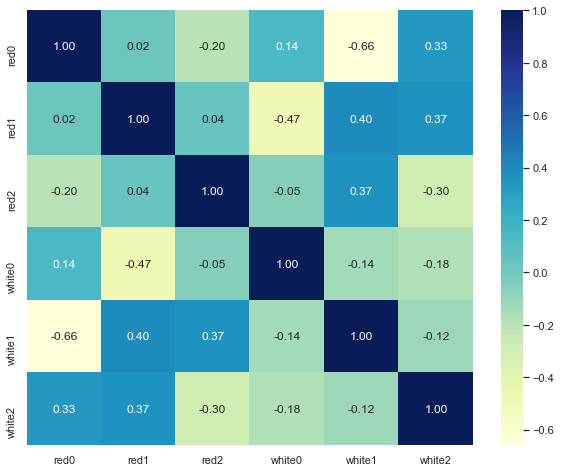

In [25]:
#PCA
red_pca = PCA(n_components=3)
white_pca = PCA(n_components=3)
all_pca = PCA(n_components=3)

red_pca.fit(normalized_red_X)
white_pca.fit(normalized_white_X)
all_pca.fit(normalized_all_X)

sns.set(rc={'figure.figsize': (10, 8)})
corr = pd.DataFrame(np.corrcoef(red_pca.components_,white_pca.components_),columns=['red0','red1','red2','white0','white1','white2'])
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.show()
red_pca_vec_arr = [np.array(red_pca.components_[0]), np.array(red_pca.components_[1]), np.array(red_pca.components_[2])]
white_pca_vec_arr = [np.array(white_pca.components_[0]), np.array(white_pca.components_[1]), np.array(white_pca.components_[2])]
all_pca_vec_arr = [np.array(all_pca.components_[0]), np.array(all_pca.components_[1]), np.array(all_pca.components_[2])]



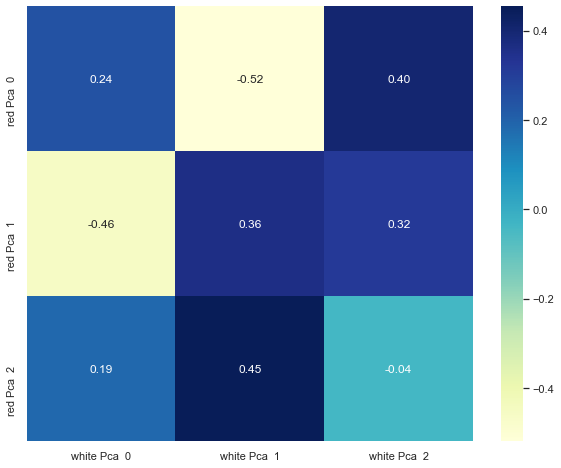

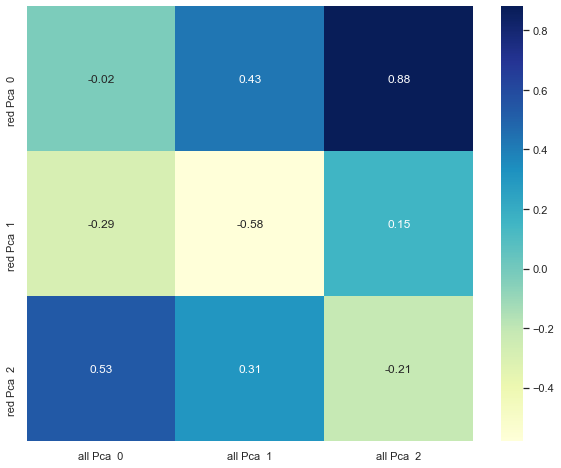

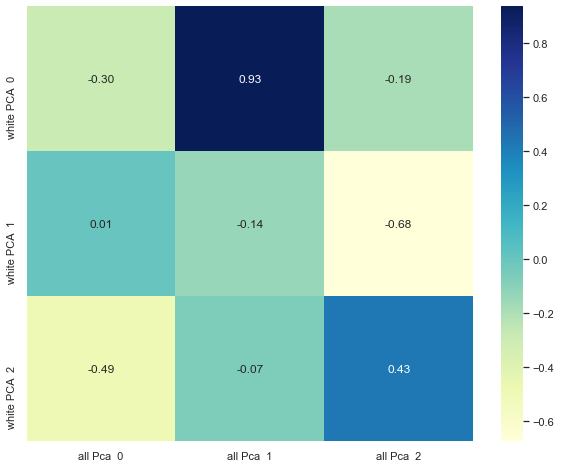

In [26]:

def compareTwoPCAs(PCA_vecs1, PCA_vecs1_name: str, PCA_vecs2, PCA_vecs2_name:str):
    table = []
    for i in range(0,len(PCA_vecs1)):
        table.append([])
        for j in range(0,len(PCA_vecs2)):
            table[i].append(math.cos(angle(PCA_vecs1[i], PCA_vecs2[j])))
    sns.set(rc={'figure.figsize': (10, 8)})
    df = pd.DataFrame(table, columns=[PCA_vecs2_name+' 0', PCA_vecs2_name+' 1', PCA_vecs2_name+' 2'],
                        index=[PCA_vecs1_name+' 0', PCA_vecs1_name+' 1', PCA_vecs1_name+' 2'])
    sns.heatmap(df,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
    plt.show()


compareTwoPCAs(red_pca_vec_arr, 'red Pca ', white_pca_vec_arr, 'white Pca ')
plt.show()
compareTwoPCAs(red_pca_vec_arr, 'red Pca ', all_pca_vec_arr, 'all Pca ')
plt.show()
compareTwoPCAs(white_pca_vec_arr, 'white PCA ', all_pca_vec_arr, 'all Pca ')
plt.show()


In [ ]:

# Question number 3

# 3A- Exploring the learning ease of each attribute:

class Combination:
    def __init__(self, att_comb, rmse):
        self.att_comb = att_comb
        self.rmse = rmse

    def get_att_comb(self):
        return self.att_comb

    def get_rmse(self):
        return self.rmse

    def get_number_of_atributes(self):
        return len(self.att_comb)


def calc_lin_reg_rmse(X, combination, attribute_df) -> float:
    X_train, X_test, attribute_train, attribute_test = train_test_split(X[[col for col in combination]],
                                                                        attribute_df, test_size=0.18, random_state=42)
    reg = LinearRegression().fit(X_train, attribute_train)
    attribute_pred = reg.predict(X_test)

    return mean_squared_error(attribute_test, attribute_pred) ** 0.5


def open_tuple_with_dict(dictionary, tup):
    vals_list = [dictionary[i] for i in tup]
    return tuple(vals_list)


In [ ]:


# # Linear regresion RMSE of attribute,
# # depending on the number of attributes used in the learning process

attribute_combinations_list = []
for attribute in X.columns.tolist():
    attribute_df = X[attribute]
    current_X = X.drop([attribute], axis=1)
    attributes = X.columns.tolist()
    attributes.remove(attribute)
    attributes_dict = {}
    for i in range(10):
        attributes_dict[i] = attributes[i]
    current_X.columns = range(10)
    combinations_list = []
    for i in range(10):
        min_rmse = float('inf')
        min_combination = ()
        for combination in combinations(range(10), i + 1):
            lin_reg_calc = calc_lin_reg_rmse(current_X, combination, attribute_df)
            if lin_reg_calc < min_rmse:
                min_rmse = lin_reg_calc
                min_combination = combination
        min_combination = open_tuple_with_dict(attributes_dict, min_combination)
        combinations_list.append(Combination(min_combination, min_rmse))
    attribute_combinations_list.append((attribute, combinations_list))

attribute = 'quality'
attribute_df = Y.copy()
current_X = X.copy()
attributes = X.columns.tolist()
attributes_dict = {}
for i in range(11):
    attributes_dict[i] = attributes[i]
current_X.columns = range(11)
combinations_list = []
for i in range(11):
    min_rmse = float('inf')
    min_combination = ()
    for combination in combinations(range(11), i + 1):
        lin_reg_calc = calc_lin_reg_rmse(current_X, combination, attribute_df)
        if lin_reg_calc < min_rmse:
            min_rmse = lin_reg_calc
            min_combination = combination
    min_combination = open_tuple_with_dict(attributes_dict, min_combination)
    combinations_list.append(Combination(min_combination, min_rmse))
attribute_combinations_list.append((attribute, combinations_list))

fig, axs = plt.subplots(6, 2, figsize=(25, 45))
for attribute in range(len(X.columns.tolist())):
    xs = [i + 1 for i in range(10)]
    ys = [comb.get_rmse() for comb in attribute_combinations_list[attribute][1]]
    axs[int(attribute / 2), int(attribute % 2)].set_xlabel('number of attributes', fontsize=16)
    axs[int(attribute / 2), int(attribute % 2)].set_ylabel('min rmse', fontsize=16)
    #     axs[int(attribute / 2), int(attribute % 2)].axhline(0, lw=0.5, color='black')
    #     axs[int(attribute / 2), int(attribute % 2)].axvline(0, lw=0.5, color='black')
    axs[int(attribute / 2), int(attribute % 2)].set_title(attribute_combinations_list[attribute][0], fontsize=24)
    axs[int(attribute / 2), int(attribute % 2)].plot(xs, ys)
# quality:
attribute = 11
xs = [i + 1 for i in range(11)]
ys = [comb.get_rmse() for comb in attribute_combinations_list[attribute][1]]
axs[int(attribute / 2), int(attribute % 2)].set_xlabel('number of attributes', fontsize=16)
axs[int(attribute / 2), int(attribute % 2)].set_ylabel('min rmse', fontsize=16)
#     axs[int(attribute / 2), int(attribute % 2)].axhline(0, lw=0.5, color='black')
#     axs[int(attribute / 2), int(attribute % 2)].axvline(0, lw=0.5, color='black')
axs[int(attribute / 2), int(attribute % 2)].set_title(attribute_combinations_list[attribute][0], fontsize=24)
axs[int(attribute / 2), int(attribute % 2)].plot(xs, ys)
##
fig.tight_layout(pad=10.0)

i = 11
print('for ' + data.columns.tolist()[i] + ':')
for comb in attribute_combinations_list[i][1]:
    print('    for ' + str(comb.get_number_of_atributes()) + ' attributes combination: ')
    print('    the min rmse is: ' + str(comb.get_rmse()) + ', with the combination: ')
    print('    ' + str(comb.get_att_comb()))



In [ ]:

# # 3B- Optimal result for the attributes learning
# Relies on the graphs above, using the elbow method.

def learn_attribute(attribute_placement, num_of_attributes, attribute_combinations_list):
    print('For ' + attribute_combinations_list[attribute_placement][0] + ',')
    print('we got the optimal result when learning with ' + str(num_of_attributes) + ' attributes,')
    print('and those attributes are: ' +
          str(attribute_combinations_list[attribute_placement][1][num_of_attributes - 1].get_att_comb()))


def print_optimal_learning_results(num_of_att_list, attribute_combinations_list):
    for i in range(11):
        learn_attribute(i, num_of_att_list[i], attribute_combinations_list)
        print()


num_of_att_list = [4, 3, 2, 4, 6, 9, 7, 4, 4, 5, 5]
print_optimal_learning_results(num_of_att_list, attribute_combinations_list)

n = 11

colors = {}
colors_list = ['#FF0000', '#FF00A2', '#C332EF', '#2B00FF', '#00EFFF', '#29CD44', '#EFFF00', '#E9A70D',
               '#6E7F00', '#7F007A', '#000000']

attribute_to_index = {}

for i in range(len(X.columns.tolist())):
    colors[i] = colors_list[i]
    attribute_to_index[X.columns.tolist()[i]] = i

G = nx.MultiDiGraph()
columns = X.columns.tolist()
G.add_nodes_from(columns)

node_list = G.nodes()
angle = []
angle_dict = {}
for i, node in zip(range(n), node_list):
    theta = 2.0 * np.pi * i / n
    angle.append((np.cos(theta), np.sin(theta)))
    angle_dict[node] = theta

for attribute_placement in range(len(columns)):
    for j in range(num_of_att_list[attribute_placement]):
        G.add_edges_from([(attribute_combinations_list[attribute_placement][0],
                           attribute_combinations_list[attribute_placement][1][
                               num_of_att_list[attribute_placement] - 1].get_att_comb()[j])])

existence_matrix = [[0 for j in range(11)] for i in range(11)]
for e in G.edges:
    num_of_same_edges = max(existence_matrix[attribute_to_index[e[0]]][attribute_to_index[e[1]]],
                            existence_matrix[attribute_to_index[e[1]]][attribute_to_index[e[0]]])
    existence_matrix[attribute_to_index[e[0]]][attribute_to_index[e[1]]] = num_of_same_edges + 1
    existence_matrix[attribute_to_index[e[1]]][attribute_to_index[e[0]]] = num_of_same_edges + 1


def edge_num(att1, att2):
    edge_num = existence_matrix[attribute_to_index[att1]][attribute_to_index[att2]] - 1
    existence_matrix[attribute_to_index[att1]][attribute_to_index[att2]] -= 1
    existence_matrix[attribute_to_index[att2]][attribute_to_index[att2]] -= 1
    return edge_num


color_map = []
for node in G:
    color_map.append(colors[attribute_to_index[node]])

# figsize is intentionally set small to condense the graph
fig, ax = plt.subplots(figsize=(5, 5))
margin = 0.1
fig.subplots_adjust(margin, margin, 1. - margin, 1. - margin)
ax.axis('equal')

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=100, alpha=1, with_labels=True)
ax = plt.gca()

for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="<-", color=colors[attribute_to_index[e[0]]],
                                shrinkA=15, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr', str(0.3 * edge_num(e[0], e[1]))
                                                                       ),
                                ),
                )

description = nx.draw_networkx_labels(G, pos)

factor_dic = {
    'fixed_acidity': (0.09, 0),
    'volatile_acidity': (0.1, -0.02),
    'citric_acid': (0, -0.03),
    'residual_sugar': (0, -0.04),
    'chlorides': (0, -0.01),
    'free_sulfur_dioxide': (0, 0.05),
    'total_sulfur_dioxide': (0, -0.05),
    'density': (0, 0),
    'pH': (0, 0.03),
    'sulphates': (0, 0.025),
    'alcohol': (0, 0),
}

r = fig.canvas.get_renderer()
trans = plt.gca().transData.inverted()
for node, t in description.items():
    bb = t.get_window_extent(renderer=r)
    bbdata = bb.transformed(trans)
    radius = 1 + 0.1
    x_factor = factor_dic[str(node)][0]
    y_factor = factor_dic[str(node)][1]
    position = (radius * np.cos(angle_dict[node]) + x_factor, radius * np.sin(angle_dict[node]) + y_factor)
    t.set_position(position)
    t.set_clip_on(False)

plt.axis('off')
plt.show()


In [ ]:


# World's greatest grape


def CustumLossFunction(x: list, model):
    X_df = pd.DataFrame([x], columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                                      'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
                                      'density', 'pH', 'sulphates', 'alcohol'])
    prediction_value = model.predict(X_df)
    while type(prediction_value) != int:
        prediction_value = prediction_value[0]
    return abs(10 - prediction_value)


methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP', 'trust-constr']

model = SVR_rbf
min_error = 100
best_method = ''
x0 = list(data[data.quality == 9].mean().to_frame().T.drop(['quality'], axis=1).values[0])
for m in methods:
    res = minimize(CustumLossFunction, x0, method=m, tol=1e-6, options={'maxiter': 10000})
    if res.fun < min_error:
        best_method = m
        min_error = res.fun

print(best_method)
print(min_error)
res = minimize(CustumLossFunction, x0, method=best_method, tol=1e-6, options={'maxiter': 10000})
print('best grape SVR_rbf score: ', SVR_rbf.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape DNN score: ', DNN_model.predict(pd.Series(res.x).to_frame().T)[0][0])
print('best grape SVR_lin score: ', SVR_lin.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape SVR_poly score: ', SVR_poly.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape Linear regression score: ', reg.predict(pd.Series(res.x).to_frame().T)[0])
